In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import missingno as msno
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OnlineRetail.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
162769,550517,22607,WOODEN ROUNDERS GARDEN SET,4,19-04-2011 08:17,9.95,14352.0,United Kingdom
523735,580519,84030e,ENGLISH ROSE HOT WATER BOTTLE,2,04-12-2011 14:51,9.13,NaN,United Kingdom
445123,574777,21818,GLITTER HEART DECORATION,36,07-11-2011 10:23,0.39,17761.0,United Kingdom
238032,557892,23078,ICE CREAM PEN LIP GLOSS,24,23-06-2011 14:11,1.25,14534.0,United Kingdom
308435,563954,22729,ALARM CLOCK BAKELIKE ORANGE,8,22-08-2011 10:59,3.75,16652.0,United Kingdom


# EDA

In [4]:
df.shape

(541909, 8)

In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [8]:
#Missing Values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [9]:
missing_values = df.isnull().sum() / len(df) * 100
missing_values.round(2).sort_values(ascending=False)

,0
CustomerID,24.93
Description,0.27
InvoiceNo,0.00
StockCode,0.00
Quantity,0.00
InvoiceDate,0.00
UnitPrice,0.00
Country,0.00


In [10]:
#Duplicate Values
df.duplicated().sum()

5268

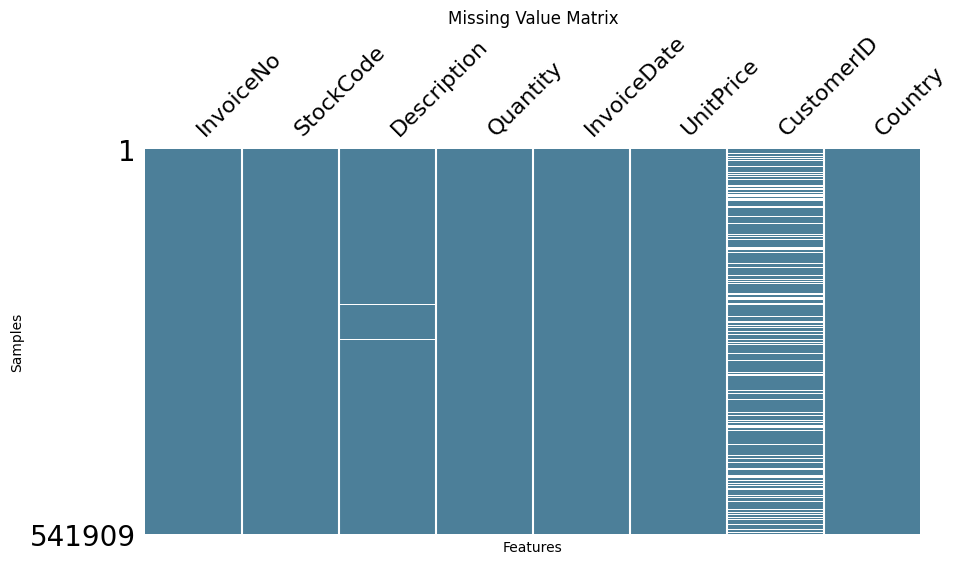

In [11]:
msno.matrix(df=df, figsize=(10,5), sparkline=False, color=(0.3, 0.5, 0.6))
plt.title('Missing Value Matrix')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

In [12]:
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [13]:
#Creating DataFrame without the cancelled Orders
df_without_cancelled = df[~df['InvoiceNo'].str.startswith('C')]

In [14]:
df_without_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [15]:
top_product = df_without_cancelled.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_product

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
JUMBO BAG RED RETROSPOT,48478
WHITE HANGING HEART T-LIGHT HOLDER,37895
POPCORN HOLDER,36761
ASSORTED COLOUR BIRD ORNAMENT,36461
PACK OF 72 RETROSPOT CAKE CASES,36419
RABBIT NIGHT LIGHT,30788


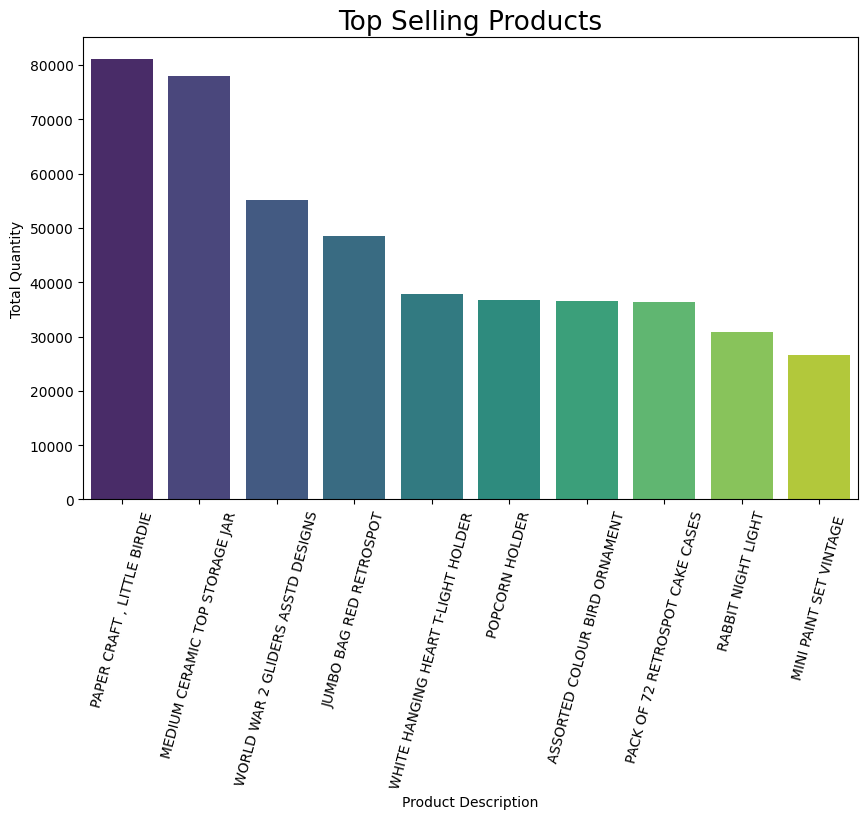

In [16]:
#Plotting BarPlot Of the Top Selling Product
plt.figure(figsize=(10, 6))
sns.barplot(x=top_product.index, y=top_product.values, palette='viridis')
plt.title('Top Selling Products', size=19)
plt.xlabel('Product Description')
plt.ylabel('Total Quantity')
plt.xticks(rotation=75)
plt.show()

In [17]:
#Removing Duplicates and Missing value from the customer ID to Avoid the negative values
df_without_cancelled = df_without_cancelled.dropna(subset=['CustomerID']).drop_duplicates()
least_products = df_without_cancelled.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(15)
least_products

,Quantity
Description,
BLOSSOM IMAGES SCRAP BOOK SET,1
PACK 4 FLOWER/BUTTERFLY PATCHES,1
BLACK DROP EARRINGS W LONG BEADS,1
VINTAGE BEAD PINK JEWEL STAND,1
SET/3 FLORAL GARDEN TOOLS IN BAG,1
WHITE ROSEBUD PEARL EARRINGS,1
WHITE STONE/CRYSTAL EARRINGS,1
SET/3 TALL GLASS CANDLE HOLDER PINK,1
CROCHET DOG KEYRING,1


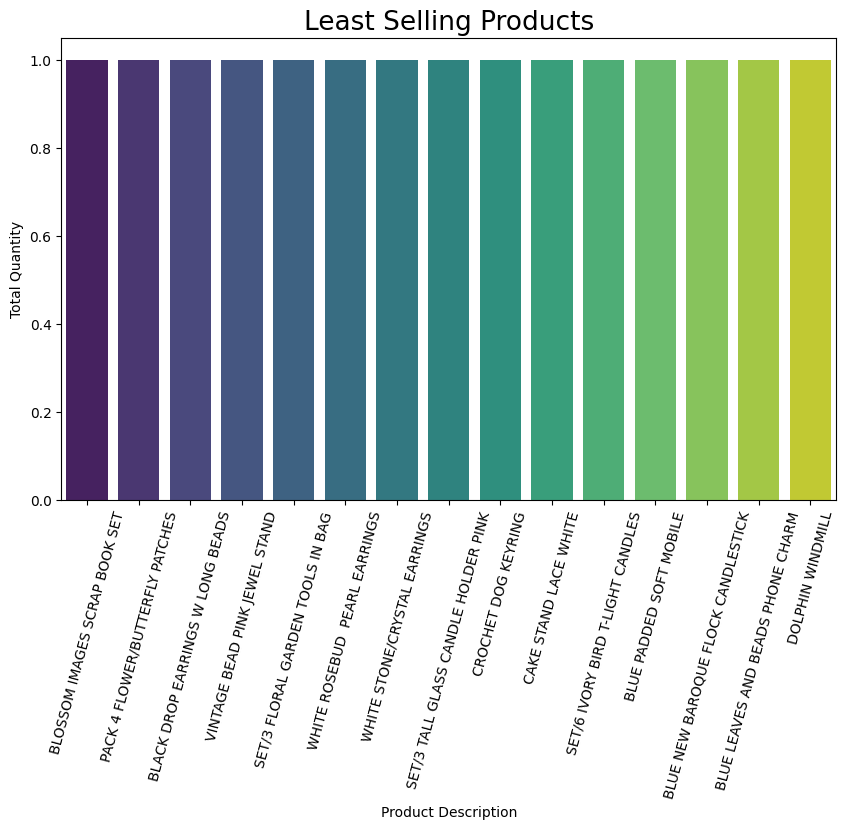

In [19]:
#Plotting BarPlot Of the Least Selling Product
plt.figure(figsize=(10, 6))
sns.barplot(x=least_products.index, y=least_products.values, palette='viridis')
plt.title('Least Selling Products', size=19)
plt.xlabel('Product Description')
plt.ylabel('Total Quantity')
plt.xticks(rotation=75)
plt.show()

In [20]:
#Top 10 Customers who buys the most quantity
top_customers = df_without_cancelled.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_customers

,Quantity
CustomerID,
14646.0,197491
16446.0,80997
14911.0,80490
12415.0,77670
12346.0,74215
17450.0,69973
17511.0,64549
18102.0,64124
13694.0,63312


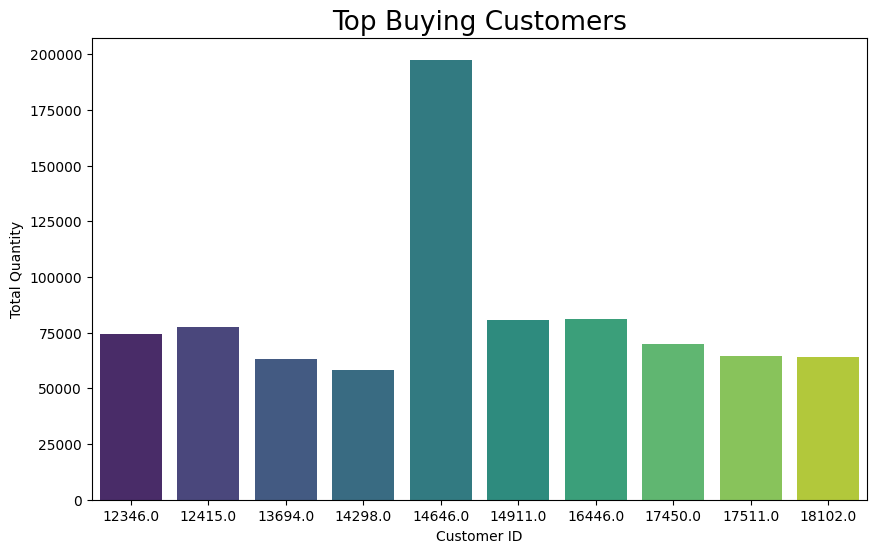

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')
plt.title('Top Buying Customers', size=19)
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity')
plt.show()

In [22]:
#Top 10 customers who frequently buys
top_frequent_customer = df_without_cancelled['CustomerID'].value_counts().head(10)
top_frequent_customer

,count
CustomerID,
17841.0,7676
14911.0,5672
14096.0,5111
12748.0,4413
14606.0,2677
15311.0,2366
14646.0,2080
13089.0,1814
13263.0,1667


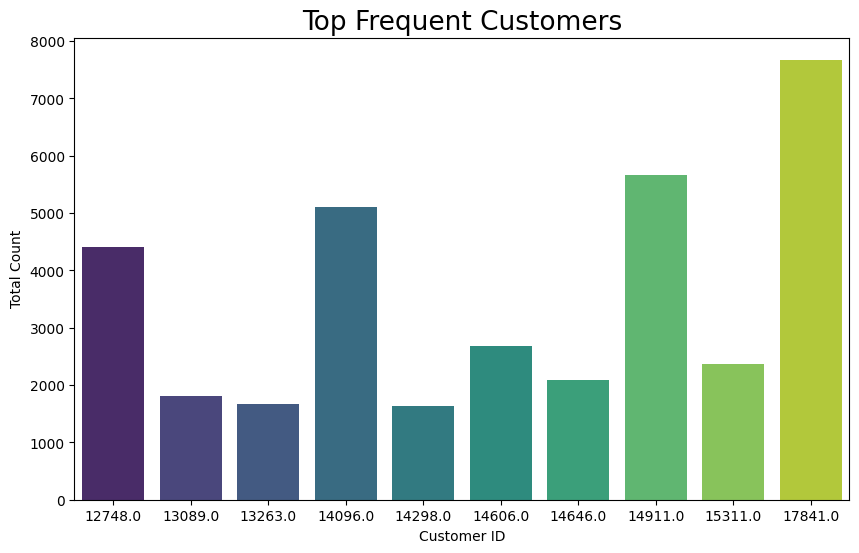

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_frequent_customer.index, y = top_frequent_customer.values , palette='viridis')
plt.title('Top Frequent Customers', size=19)
plt.xlabel('Customer ID')
plt.ylabel('Total Count')
plt.show()

In [27]:
#Countries from where most purchases are made
top_countries = df_without_cancelled['Country'].value_counts().head()
top_countries

,count
Country,
United Kingdom,349227
Germany,9027
France,8327
EIRE,7228
Spain,2480


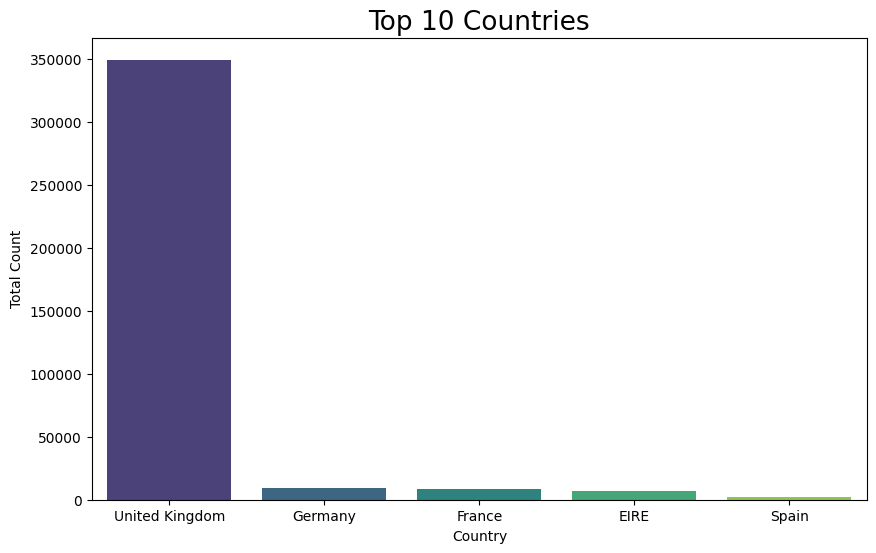

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y = top_countries.values , palette='viridis')
plt.title('Top 10 Countries', size=19)
plt.xlabel('Country')
plt.ylabel('Total Count')
plt.show()

In [ ]:
#Missing Values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#Handling Missing and Duplicate Values

df.dropna(subset=['CustomerID'], inplace=True)
df.drop_duplicates(inplace=True)

df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
#Removing the cancelled Orders
df = df[~df['InvoiceNo'].str.startswith('C')]

df.shape

(392732, 8)

# Feature Engineering

In [ ]:
#Create new Column for TotalCost
df['TotalCost'] = df['Quantity'] * df['UnitPrice']
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
123791,546913,85040B,SET/4 BLUE FLOWER CANDLES IN BOWL,8,17-03-2011 20:18,1.65,15861.0,United Kingdom,13.20
181430,552469,22077,6 RIBBONS RUSTIC CHARM,5,09-05-2011 15:34,1.65,12867.0,United Kingdom,8.25
399623,571283,23089,GLASS BON BON JAR,2,16-10-2011 13:51,1.95,16533.0,United Kingdom,3.90
287132,562085,23118,PARISIENNE JEWELLERY DRAWER,2,02-08-2011 12:27,7.50,15228.0,United Kingdom,15.00
519224,580137,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,01-12-2011 19:54,2.95,17566.0,United Kingdom,2.95


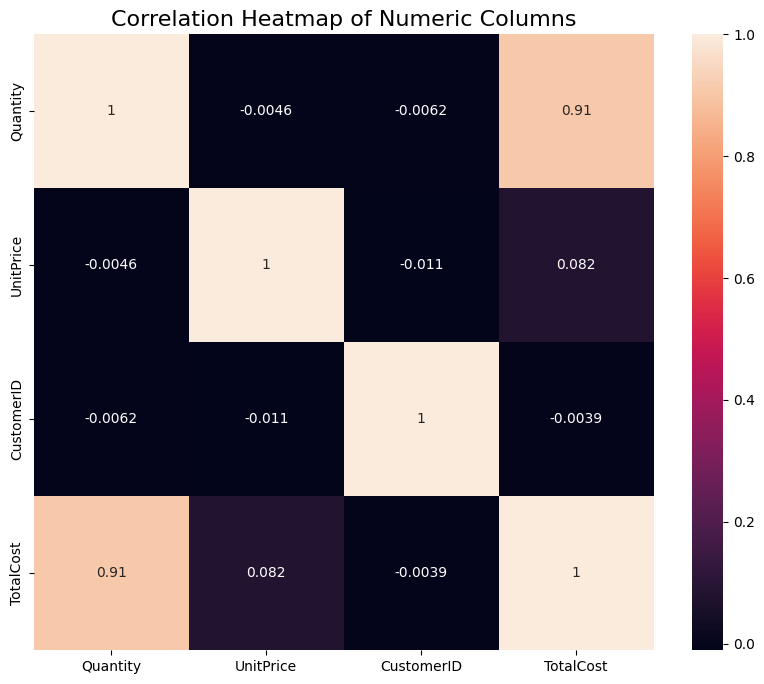

In [ ]:
# Selecting numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap of Numeric Columns', fontsize=16)
plt.show()

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
509536,579350,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-11-29 11:48:00,2.55,15218.0,United Kingdom,81.60
189902,553174,22844,VINTAGE CREAM DOG FOOD CONTAINER,1,2011-05-15 11:04:00,8.50,16206.0,United Kingdom,8.50
471210,576626,23100,SILVER BELLS TABLE DECORATION,1,2011-11-15 17:26:00,1.25,12890.0,United Kingdom,1.25
459257,575871,21470,FLOWER VINE RAFFIA FOOD COVER,6,2011-11-11 12:52:00,3.75,14911.0,EIRE,22.50
63080,541518,90108,BLUE BLOSSOM HAIR CLIP,12,2011-01-19 09:05:00,1.05,12451.0,Switzerland,12.60


Performing **RFM Analysis** as it would be appropriate for the data.

**Recency:** How recently each customer made a purchase (based on InvoiceDate).

**Frequency:** How often each customer makes purchases (based on the number of invoices per CustomerID).

**Monetary Value:** How much each customer spends (calculated using Quantity * UnitPrice per customer).

In [ ]:
#Finding each customers RFM value

#Recency

day = '2012-01-01'
day = pd.to_datetime(day)
recency = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x:((day-x.max()).days)})
recency.head(10)

,InvoiceDate
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
12352.0,58
12353.0,226
12354.0,254
12355.0,236


In [ ]:
#Frequency
freq = df.drop_duplicates(subset='InvoiceNo').groupby('CustomerID')['InvoiceNo'].count()

In [ ]:
freq.head(10)

,InvoiceNo
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1
12352.0,8
12353.0,1
12354.0,1
12355.0,1


In [ ]:
#Monetary
money = df.groupby('CustomerID')['TotalCost'].sum()

In [ ]:
money.head()

,TotalCost
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [ ]:
RFM = pd.concat([recency, freq, money], axis=1)
#Change the column name
RFM.columns = ['Recency', 'Frequency', 'Monetary']

In [ ]:
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,2,178.05


In [ ]:
RFM.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.260459,-0.121924
Frequency,-0.260459,1.000000,0.553223
Monetary,-0.121924,0.553223,1.000000


<Axes: >

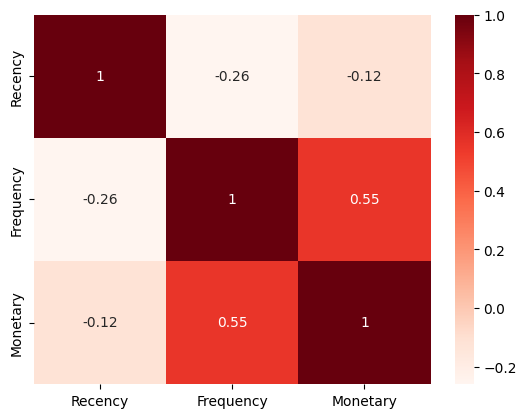

In [ ]:
# Plot the heatmap of the feature correlations in the dataframe
sns.heatmap(RFM.corr(), annot = True, cmap = 'Reds')

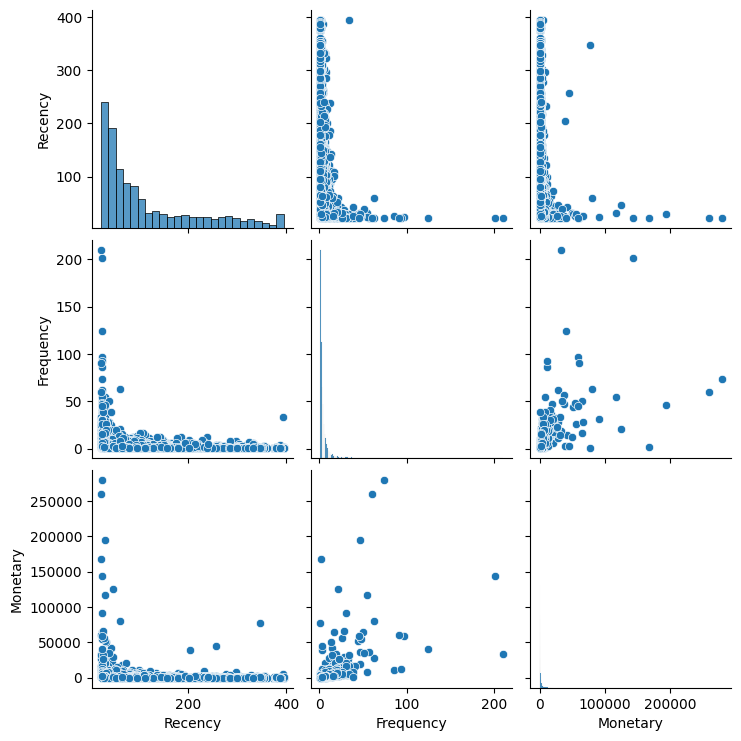

In [ ]:
sns.pairplot(RFM)

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)

In [ ]:
inertia = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled)
  inertia.append(kmeans.inertia_)
  print(f'Inertia for {i} clusters: {kmeans.inertia_}')

Inertia for 1 clusters: 13017.000000000004
Inertia for 2 clusters: 9016.106287884933
Inertia for 3 clusters: 5442.730528121175
Inertia for 4 clusters: 4097.859817028656
Inertia for 5 clusters: 3122.356941873757
Inertia for 6 clusters: 2473.713892431336
Inertia for 7 clusters: 2023.5346203199601
Inertia for 8 clusters: 1716.0928680922675
Inertia for 9 clusters: 1463.8893388864658
Inertia for 10 clusters: 1284.2149122288024


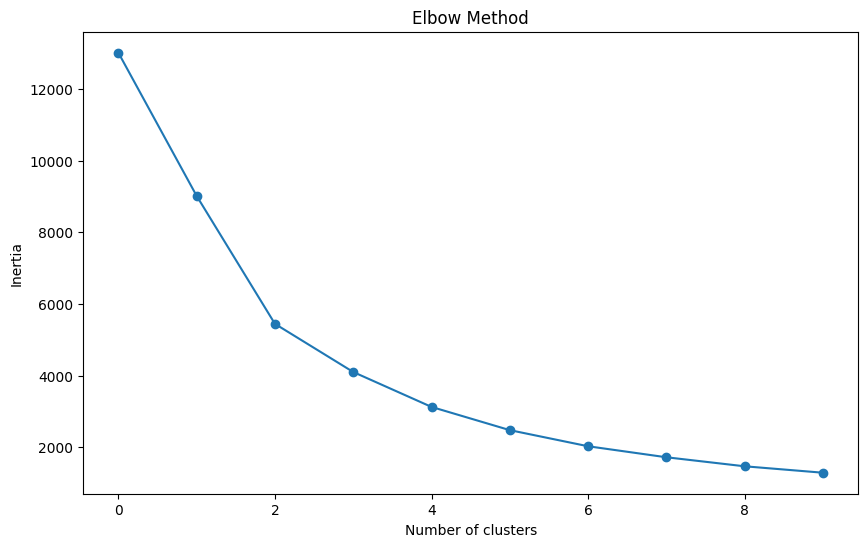

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Choosing No of Clusters = 3 from the Elbow method
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM['Cluster'] = (kmeans.labels_)

In [ ]:
# RFM[RFM['Cluster']==2]
RFM

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,347,1,77183.60,0
12347.0,24,7,4310.00,2
12348.0,97,4,1797.24,2
12349.0,40,1,1757.55,2
12350.0,332,1,334.40,0
...,...,...,...,...
18280.0,299,1,180.60,0
18281.0,202,1,80.82,0
18282.0,29,2,178.05,2


In [ ]:
group = RFM.groupby("Cluster")[["Recency","Frequency","Monetary"]].mean()
group

,Recency,Frequency,Monetary
Cluster,,,
0,268.122355,1.581417,629.931399
1,27.461538,66.500000,85826.078077
2,62.821761,4.676999,1850.897530


In [ ]:
def func(row):
  if row['Cluster'] == 0:
    return 'Lost Customers'
  elif row['Cluster'] == 1:
    return 'Loyal Customers'
  else:
    return 'Average Customers'

In [ ]:
RFM['Conditions'] = RFM.apply(func, axis=1)

In [ ]:
RFM

,Recency,Frequency,Monetary,Cluster,Conditions
CustomerID,,,,,
12346.0,347,1,77183.60,0,Lost Customers
12347.0,24,7,4310.00,2,Average Customers
12348.0,97,4,1797.24,2,Average Customers
12349.0,40,1,1757.55,2,Average Customers
12350.0,332,1,334.40,0,Lost Customers
...,...,...,...,...,...
18280.0,299,1,180.60,0,Lost Customers
18281.0,202,1,80.82,0,Lost Customers
18282.0,29,2,178.05,2,Average Customers


In [ ]:
RFM[RFM['Cluster']==1].sort_values(by =['Frequency'], ascending=False)

,Recency,Frequency,Monetary,Cluster,Conditions
CustomerID,,,,,
12748.0,22,210,33053.19,1,Loyal Customers
14911.0,23,201,143711.17,1,Loyal Customers
17841.0,23,124,40519.84,1,Loyal Customers
13089.0,24,97,58762.08,1,Loyal Customers
14606.0,23,93,12076.15,1,Loyal Customers
15311.0,22,91,60632.75,1,Loyal Customers
12971.0,25,86,11189.91,1,Loyal Customers
14646.0,23,74,280206.02,1,Loyal Customers
16029.0,60,63,80850.84,1,Loyal Customers


In [ ]:
RFM[RFM['Cluster']==0].sort_values(by =['Recency'], ascending=False)

,Recency,Frequency,Monetary,Cluster,Conditions
CustomerID,,,,,
16048.0,395,2,256.44,0,Lost Customers
17968.0,395,1,265.10,0,Lost Customers
15922.0,395,1,369.50,0,Lost Customers
15350.0,395,1,115.65,0,Lost Customers
14729.0,395,1,313.49,0,Lost Customers
...,...,...,...,...,...
16305.0,160,1,361.22,0,Lost Customers
16178.0,160,1,197.90,0,Lost Customers
13116.0,160,1,501.14,0,Lost Customers


In [ ]:
result = RFM['Conditions'].value_counts()
result

,count
Conditions,
Average Customers,3226
Lost Customers,1087
Loyal Customers,26


# Visualization

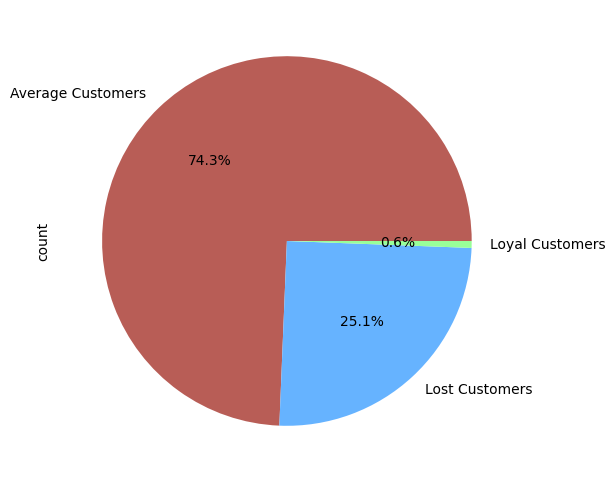

In [ ]:
result.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 6), colors = ['#b85d56','#66b3ff', '#99ff99']);

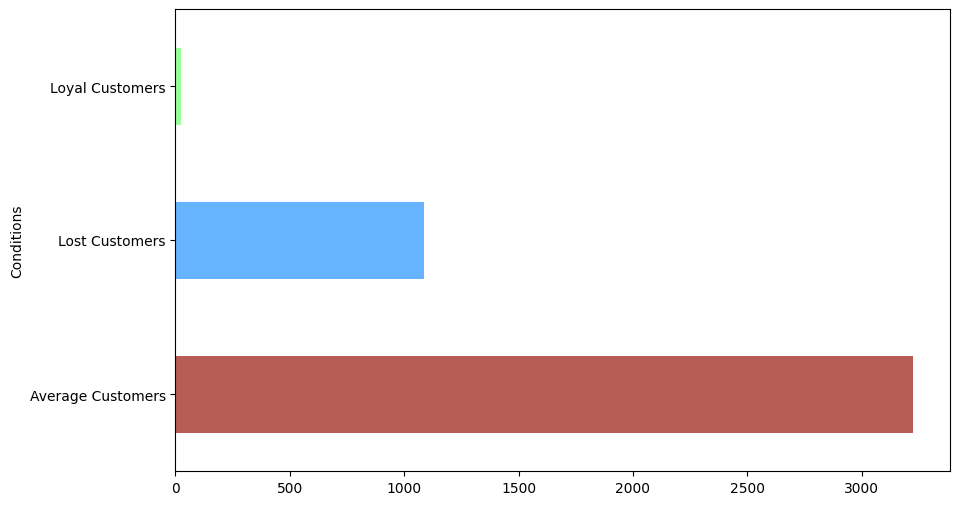

In [ ]:
result.plot(kind='barh',figsize=(10, 6), color = ['#b85d56','#66b3ff', '#99ff99']);

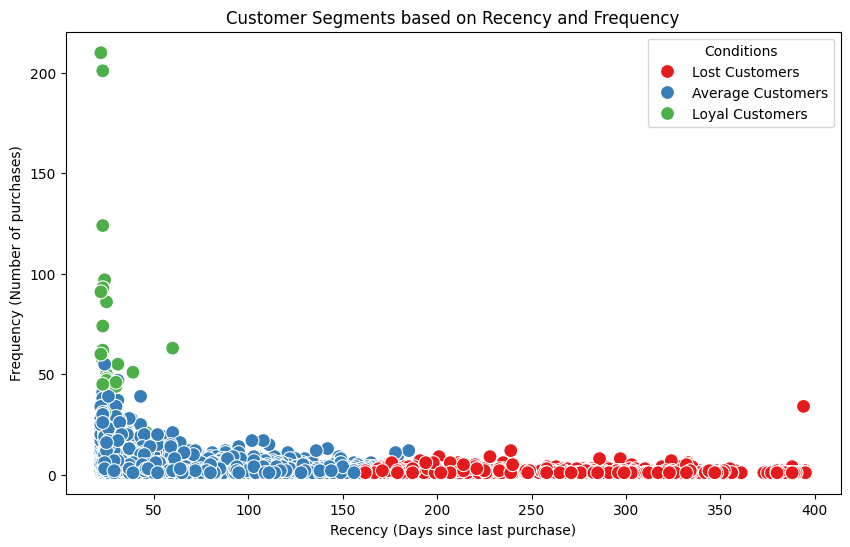

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Conditions', data=RFM, palette='Set1', s=100)
plt.title('Customer Segments based on Recency and Frequency')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency (Number of purchases)')
plt.show()

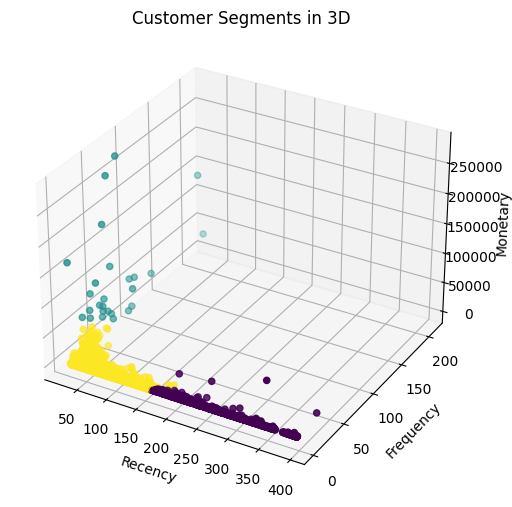

In [ ]:
#3D Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFM['Recency'], RFM['Frequency'], RFM['Monetary'], c=RFM['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Customer Segments in 3D')
plt.show()

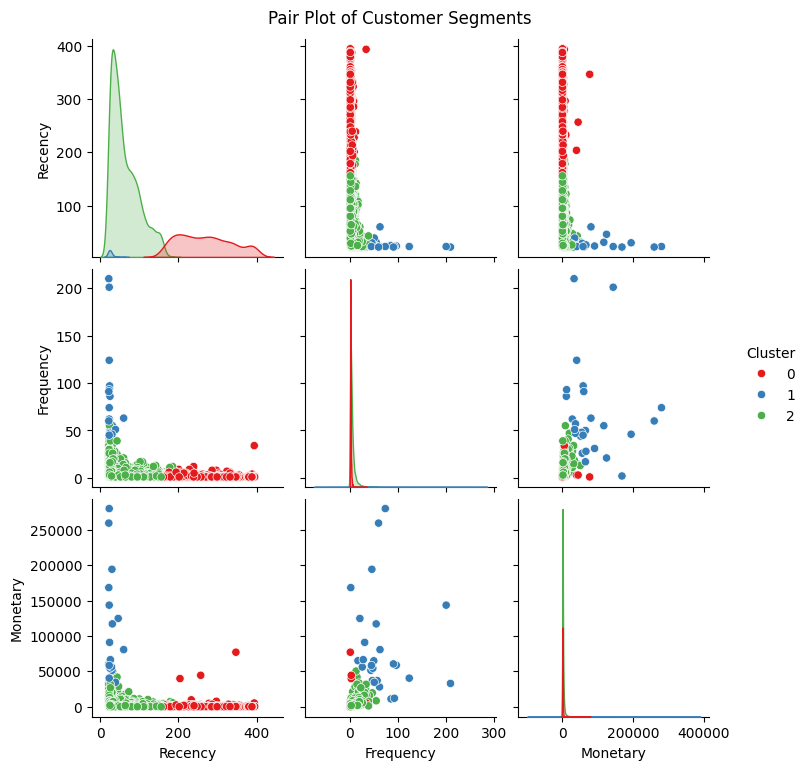

In [ ]:
# pairplot to visualize the relationships between Recency, Frequency, and Monetary
sns.pairplot(RFM[['Recency', 'Frequency', 'Monetary', 'Cluster']], hue='Cluster', palette='Set1')
plt.suptitle('Pair Plot of Customer Segments', y=1.02)
plt.show()